# Лабораторная работа № 2
# Инкин Артем 6206-010302D
# Вариант 4

In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt
import pandas as pd

### 1. Создать квадратную матрицу из случайных вещественных чисел размера 10 . Найти скалярное произведение 2 строки на 7 столбец. Использовать срезы матриц.

In [ ]:
matrix = np.random.rand(10, 10)
row2 = matrix[1, :]
col7 = matrix[:, 6]
result = np.dot(row2, col7)
print(result)

2.8072835382248984


### 2. Создать вектор-строку 1x10 из случайных целых чисел. Вычислить норму ||x||4 самостоятельно написанной функцией и проверить результат с помощью linalg.norm() в Python.

In [ ]:
vector = []
for _ in range(10):
    vector.append(random.randint(1, 100))

def norm(vector):
    return np.sum(np.abs(vector)**4)**(0.25)

my_norm = norm(vector)
norm_linalg = np.linalg.norm(vector, ord=4)
print("Норма собственной функцией: ", my_norm)
print("Норма с помощью linalg: ", norm_linalg)

Норма собственной функцией:  125.48071842499844
Норма с помощью linalg:  125.48071842499844


### 3. Создать матрицу из случайных целых чисел. Найти норму матрицы ||A|| бесконечность с помощью самостоятельно написанного алгоритма, проверить результат с помощью linalg.norm() в Python.


In [ ]:
matrix = []
for _ in range(3):
    row = []
    for _ in range(3):
        row.append(random.randint(1, 100))
    matrix.append(row)

def matr_norm(matr):
    max_row_sum = 0.0
    for row in matrix:
        row_sum = sum(np.abs(row))
        if row_sum > max_row_sum:
            max_row_sum = row_sum
    return max_row_sum

my_matr_norm = matr_norm(matrix)
norm_linalg = np.linalg.norm(matrix, np.inf)
print("Норма собственной функцией: ", my_matr_norm)
print("Норма с помощью linalg: ", norm_linalg)

Норма собственной функцией:  207
Норма с помощью linalg:  207.0


### 4. Найти псевдорешение системы
\begin{cases}
3.3x_1 + 2.1x_2 + 2.8x_3 = 0.8 \\
4.1x_1 + 3.7x_2 + 4.8x_3 = 5.7 \\
2.7x_1 + 1.8x_2 + 1.1x_3 = 3.2 \\
3.15x_1 - 1.72x_2 - 1.23x_3 = 2.15 \\
\end{cases}

In [ ]:
a = [[3.3, 2.1, 2.8],
     [4.1, 3.7, 4.8],
     [2.7, 1.8, 1.1],
     [3.15, -1.72, -1.23]]
b = [[0.8],
     [5.7],
     [3.2],
     [2.15]]

def transpose(matrix):
    return list(map(list, zip(*matrix)))

def matrix_multiply(A, B):
    result = [[0 for _ in range(len(B[0]))] for _ in range(len(A))]
    for i in range(len(A)): # перебираем строки
        for j in range(len(B[0])): # перебираем стобцы
            for k in range(len(B)): # скалярное произведение строки на столбец
                result[i][j] += A[i][k] * B[k][j]
    return result

def inverse(matrix):
    return np.linalg.inv(matrix).tolist()

def pseudoinverse(a, b):
    a_transposed = transpose(a)
    aTa = matrix_multiply(a_transposed, a) # Умножение a^T на a
    aTa_inv = inverse(aTa) # Вычисление обратной матрицы для (A^T * A)^-1
    aTb = matrix_multiply(a_transposed, b) # Умножение A^T на b
    X = matrix_multiply(aTa_inv, aTb) # Вычисление псевдорешения
    return X

result = pseudoinverse(a, b)
result_linalg = np.linalg.pinv(a).dot(b)
print("Псевдорешение собственным методом:", result)
print("Псевдорешение через linalg:", result_linalg)

Псевдорешение собственным методом: [[0.7914789513519094], [0.661408517068363], [-0.2988652951858555]]
Псевдорешение через linalg: [[ 0.79147895]
 [ 0.66140852]
 [-0.2988653 ]]


### 5. Даны пять точек (-4; 7), (-2; 1), (0; -3), (4, -8), (6, -9). Найти уравнение наиболее выгодной траектории. Построить график.

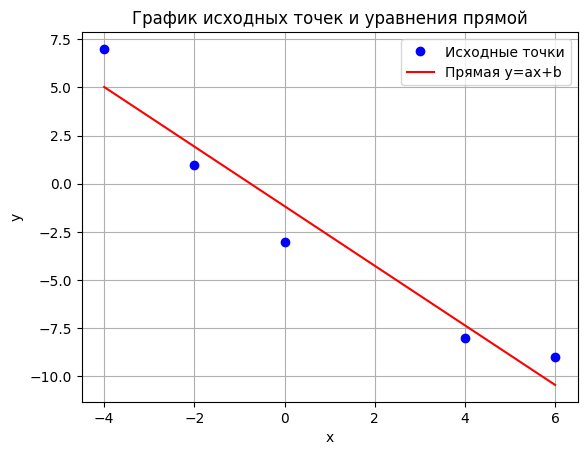

In [ ]:
A = [[-4, 1], [-2, 1], [0, 1], [4, 1], [6, 1]]
B = [[7], [1], [-3], [-8], [-9]]

def transpose(matrix):
    return list(map(list, zip(*matrix)))

def matrix_multiply(A, B):
    result = [[0 for _ in range(len(B[0]))] for _ in range(len(A))]
    for i in range(len(A)): # перебираем строки
        for j in range(len(B[0])): # перебираем стобцы
            for k in range(len(B)): # скалярное произведение строки на столбец
                result[i][j] += A[i][k] * B[k][j]
    return result

def inverse(matrix):
    return np.linalg.inv(matrix).tolist()

def pseudoinverse(a, b):
    a_transposed = transpose(a)
    aTa = matrix_multiply(a_transposed, a) # Умножение a^T на a
    aTa_inv = inverse(aTa) # Вычисление обратной матрицы для (A^T * A)^-1
    X = matrix_multiply(aTa_inv, a_transposed) # Вычисление (A^T * A)^-1 * A^T
    X = matrix_multiply(X, b) # Вычисление (A^T * A)^-1 * A^T * B
    return X

result = pseudoinverse(A, B)

# Точки для отрисовки на графике
points = [(-4, 7), (-2, 1), (0, -3), (4, -8), (6, -9)]
x = [point[0] for point in points]
y = [point[1] for point in points]

# Создаем уравнение прямой на основе коэффициентов a и b
a = result[0][0]
b = result[1][0]
line_x = range(min(x), max(x) + 1) # создаем диапазон по х
line_y = [a * xi + b for xi in line_x] # вычисляем y для каждого х

# Построение графика
plt.plot(x, y, 'bo', label='Исходные точки')
plt.plot(line_x, line_y, 'r-', label='Прямая y=ax+b')
plt.xlabel('x')
plt.ylabel('y')
plt.title('График исходных точек и уравнения прямой')
plt.legend()
plt.grid(True)
plt.show()

### 6. Решить систему, используя LU разложение матрицы. LU разложение должно быть найдено самостоятельно написанной функцией, полученные матрицы выведены на экран. Придерживаться плана решения, приведенного в пособии! Решение системы должно быть проверено встроенной функцией Python.

\begin{cases}
3.8x_1 + 14.2x_2 + 6.3x_3 - 15.5x_4 = 2.8 \\
8.3x_1 - 6.6x_2 + 5.8x_3 + 12.2x_4 = -4.7 \\
6.4x_1 - 8.5x_2 - 4.3x_3 + 8.8x_4 = 7.7 \\
17.1x_1 - 8.3x_2 + 14.4x_3 - 7.2x_4 = 13.5 \\
\end{cases}

In [ ]:
A = np.array([[3.8, 14.2, 6.3, -15.5],
              [8.3, -6.6, 5.8, 12.2],
              [6.4, -8.5, -4.3, 8.8],
              [17.1, -8.3, 14.4, -7.2]])
b = np.array([2.8, -4.7, 7.7, 13.5])

def LU_decomposition(A):
    n = len(A)
    L = np.zeros((n, n))
    U = np.zeros((n, n))

    for i in range(4):
        for j in range(4):
            if i <=j:
                U[i,j] = A[i, j] - np.dot(L[i, :i], U[:i, j])
            if i > j:
                L[i,j] = (A[i, j] - np.dot(L[i, :j], U[:j, j]))/U[j, j]

    print("Матрица L:")
    for row in L:
        print(row)
    print("\nМатрица U:")
    for row in U:
        print(row)
    return L, U

# Решаем систему Ly = b, где UX = y, прямой подстановкой
def direct_substitution(L, B):
    n = len(L)
    Y = [0] * n # создаем пустой вектор
    for i in range(n):
        Y[i] = B[i]
        for j in range(i): # перебираем все элементы в текущей строке матрицы L до i-того
            Y[i] -= L[i][j] * Y[j]
    print("\nВектор Y: ", Y)
    return Y

# Решаем систему UX = y обратной подстановкой
def back_substitution(U, Y):
    n = len(U)
    X = [0] * n # создаем пустой вектор
    for i in range(n - 1, -1, -1): # идем от последнего уравнения к первому
        X[i] = Y[i]
        for j in range(i + 1, n):
            X[i] -= U[i][j] * X[j]
        X[i] /= U[i][i]
    return X

L, U = LU_decomposition(A)
Y = direct_substitution(L, b)
result = back_substitution(U, Y)
print("\nРешение системы: ", result)
linalg_result = np.linalg.solve(A, b)
print("\nРешение системы с помощью linalg: ", linalg_result)

Матрица L:
[0. 0. 0. 0.]
[2.18421053 0.         0.         0.        ]
[1.68421053 0.86176018 0.         0.        ]
[ 4.5         1.91940674 -0.1651443   0.        ]

Матрица U:
[  3.8  14.2   6.3 -15.5]
[  0.         -37.61578947  -7.96052632  46.05526316]
[ 0.          0.         -8.05046173 -4.78332867]
[  0.           0.           0.         -26.63872219]

Вектор Y:  [2.8, -10.815789473684212, 12.304827200223873, 23.69197137824326]

Решение системы:  [0.9708633735253702, -0.5897575116053073, -1.0000203953429758, -0.8893809249070777]

Решение системы с помощью linalg:  [ 0.97086337 -0.58975751 -1.0000204  -0.88938092]


### 7. Решить систему с помощью QR разложения матрицы. QR разложение найти методом Хаусхолдера. Придерживаться плана решения, приведенного в пособии! Проверить полученное решение непосредственной подстановкой в исходную систему, а также методом np.solve.

\begin{cases}
3.8x_1 + 14.2x_2 + 6.3x_3 - 15.5x_4 = 2.8 \\
8.3x_1 - 6.6x_2 + 5.8x_3 + 12.2x_4 = -4.7 \\
6.4x_1 - 8.5x_2 - 4.3x_3 + 8.8x_4 = 7.7 \\
17.1x_1 - 8.3x_2 + 14.4x_3 - 7.2x_4 = 13.5 \\
\end{cases}

In [ ]:
A = np.array([[3.8, 14.2, 6.3, -15.5],
              [8.3, -6.6, 5.8, 12.2],
              [6.4, -8.5, -4.3, 8.8],
              [17.1, -8.3, 14.4, -7.2]])
b = np.array([2.8, -4.7, 7.7, 13.5])

def householder_reflection(A):
    (r, c) = np.shape(A)
    Q = np.identity(r)
    R = np.copy(A)
    for cnt in range(r - 1):
        x = R[cnt:, cnt]
        e = np.zeros_like(x)
        e[0] = np.linalg.norm(x)
        u = x - e
        v = u / np.linalg.norm(u)
        Q_cnt = np.identity(r)
        Q_cnt[cnt:, cnt:] -= 2.0 * np.outer(v, v)
        R = np.dot(Q_cnt, R)  # R = H(n-1)**H(2)*H(1)*A
        Q = np.dot(Q, Q_cnt)  # Q = H (N-1) * … * H (2) * H (1) H - матрица

    print("Матрица Q:")
    for row in Q:
        print(row)
    print("\nМатрица R:")
    print(np.around(R, decimals=2))
    return (Q, R)

Q, R = householder_reflection(A)

# Проверка QR разложения умножением
A_reconstructed = np.dot(Q, R)
print("\nПроверка умножением:")
print(A_reconstructed)

# Проверка QR разложения с использованием библиотечной функции
Q_lib, R_lib = np.linalg.qr(A)
print("\nПроверка с использованием библиотечной функции:")
print("Q_lib:")
print(Q_lib)
print("\nR_lib:")
print(R_lib)

def solve_Qy(Q, b):
    QT = np.transpose(Q) # Транспонируем матрицу
    # Решаем систему Qy = b, умножая вектор b на QT
    y = np.dot(QT, b)
    print("\nВектор y: ", y)
    return y

def back_substitution(R, y):
    n = len(y)
    x = np.zeros(n)
    for i in range(n - 1, -1, -1):
        x[i] = y[i]
        for j in range(i + 1, n):
            x[i] -= R[i][j] * x[j]
        x[i] /= R[i][i]
    return x

y = solve_Qy(Q, b) # Решаем систему Qy = b
result = back_substitution(R, y) # Решаем систему RX = y методом обратной подстановки
print("\nРешение системы:", result)
linalg_result = np.linalg.solve(A, b)
print("\nРешение системы с помощью np.linalg.solve():", linalg_result)

Матрица Q:
[ 0.18615377  0.9345032  -0.27916706  0.11881202]
[ 0.40659903 -0.15614632  0.12766535  0.89106516]
[ 0.31352215 -0.31964383 -0.89131216 -0.0713745 ]
[ 0.83769199 -0.01224428  0.33366142 -0.43219472]

Матрица R:
[[ 20.41  -9.66  14.25  -1.2 ]
 [ -0.    17.12   6.18 -19.11]
 [ -0.    -0.     7.62  -4.36]
 [  0.     0.     0.    11.51]]

Проверка умножением:
[[  3.8  14.2   6.3 -15.5]
 [  8.3  -6.6   5.8  12.2]
 [  6.4  -8.5  -4.3   8.8]
 [ 17.1  -8.3  14.4  -7.2]]

Проверка с использованием библиотечной функции:
Q_lib:
[[-0.18615377  0.9345032  -0.27916706 -0.11881202]
 [-0.40659903 -0.15614632  0.12766535 -0.89106516]
 [-0.31352215 -0.31964383 -0.89131216  0.0713745 ]
 [-0.83769199 -0.01224428  0.33366142  0.43219472]]

R_lib:
[[-20.413231     9.65795175 -14.24566253   1.1972627 ]
 [  0.          17.11911119   6.17987231 -19.1144915 ]
 [  0.           0.           7.61907326  -4.36130245]
 [  0.           0.           0.         -11.51311503]]

Вектор y:  [ 12.33317744   0.7

### 8. Решить систему методом простых итераций с точностью до 10^(-3). Проверить выполнение достаточного условия сходимости. Если условие не выполняется, в программе выполнить эквивалентные преобразования системы, после этого привести к удобному для итераций виду. Оформить итерации в виде таблицы (можно пользоваться модулями PrettyTable или Pandas). Проверить полученное решение.

\begin{cases}
7.3x_1 + 2.1x_2 + 2.8x_3 = 0.8 \\
4.1x_1 + 8.7x_2 + 4.8x_3 = 5.7 \\
2.7x_1 + 1.8x_2 + 9.1x_3 = 3.2 \\
\end{cases}

In [ ]:
a = np.array([[7.3, 2.1, 2.8],
              [4.1, 8.7, 4.8],
              [2.7, 1.8, 9.1]])
b = np.array([0.8, 5.7, 3.2])

# модуль каждого диагонального элемента матрицы должен быть больше суммы модулей элементов той же строки
def is_diagonally_dominant(matrix):
    n = len(matrix)
    for i in range(n):
        diagonal_element = abs(matrix[i, i])
        sum_of_other_elements = sum(abs(matrix[i, j]) for j in range(n) if j != i)
        if diagonal_element <= sum_of_other_elements:
            return False
    return True

print("Выполнение условия сходимости: ", is_diagonally_dominant(a))

# Выполним преобразования матрицы: из второй строки вычтем третью
a[1] -= a[2]
b[1] -= b[2]
# теперь условие сходимости выполняется
print("\nВыполнение условия сходимости после преобразования: ", is_diagonally_dominant(a))

def jacobi_iteration(A, b, initial_guess, tolerance=1e-3, max_iterations=1000):
    n = len(b)
    x = np.copy(initial_guess)
    iteration = 0 # счетчик итераций
    results = []
    while iteration < max_iterations:
        x_new = np.copy(x)
        for i in range(n):
            x_new[i] = (b[i] - np.dot(A[i], x) + A[i, i] * x[i]) / A[i, i]
        results.append(np.hstack([x_new, np.linalg.norm(x - x_new)]))
        if np.linalg.norm(x_new - x, np.inf) < tolerance: #  если норма разности между текущим и предыдущим решениями станет меньше tolerance
            break
        x = x_new
        iteration += 1

    return pd.DataFrame(results, columns=['x1', 'x2', 'x3', 'Norm'])

initial_guess = np.zeros(len(b))

# Выполнение итераций методом Якоби
iteration_table = jacobi_iteration(a, b, initial_guess)

# Проверка полученного решения с точностью до 10^(-3)
is_solution_close = np.allclose(np.dot(a, solution[['x1', 'x2', 'x3']]), b, atol=1e-3)
print("\nРешение близко к верному?" , is_solution_close, "\n")
print(iteration_table)

Выполнение условия сходимости:  False

Выполнение условия сходимости после преобразования:  True

Решение близко к верному? True 

         x1        x2        x3      Norm
0  0.109589  0.362319  0.351648  0.516664
1 -0.129518  0.559227  0.247465  0.326801
2 -0.146203  0.542816  0.279461  0.039641
3 -0.153754  0.566140  0.287657  0.025850
4 -0.163607  0.572780  0.285284  0.012117
5 -0.164607  0.573300  0.286894  0.001966
6 -0.165374  0.574506  0.287088  0.001443
7 -0.165796  0.574783  0.287077  0.000504
